In [12]:
pip install pandas nltk matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 31.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.5/265.5 kB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 71.1 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import nltk
from nltk.corpus import stopwords
import re

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Load English stop words
stop_words = set(stopwords.words('english'))

# Optionally add more words specific to the context of executive orders
custom_stop_words = {'order', 'president', 'section'}
stop_words = stop_words.union(custom_stop_words)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/helenwang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/Users/helenwang/Desktop/GR5052_Practicum/Cleaned_Data.csv')  

In [6]:
def clean_text(text):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize and remove stop words
    words = text.lower().split()
    cleaned_text = ' '.join([word for word in words if word not in stop_words])
    return cleaned_text

In [9]:
df['cleaned_text'] = df['text'].apply(clean_text)

In [10]:
print(df[['text', 'cleaned_text']].head())

                                                text  \
0  Executive Order 14126 of September 6, 2024 Inv...   
1  Executive Order 14125 of July 24, 2024 Establi...   
2  Executive Order 14123 of June 14, 2024 White H...   
3  Executive Order 14123 of June 14, 2024 White H...   
4  Executive Order 14122 of April 12, 2024 COVID-...   

                                        cleaned_text  
0  executive 14126 september 6 2024 investing ame...  
1  executive 14125 july 24 2024 establishing emer...  
2  executive 14123 june 14 2024 white house counc...  
3  executive 14123 june 14 2024 white house counc...  
4  executive 14122 april 12 2024 covid19 public h...  


Matplotlib is building the font cache; this may take a moment.


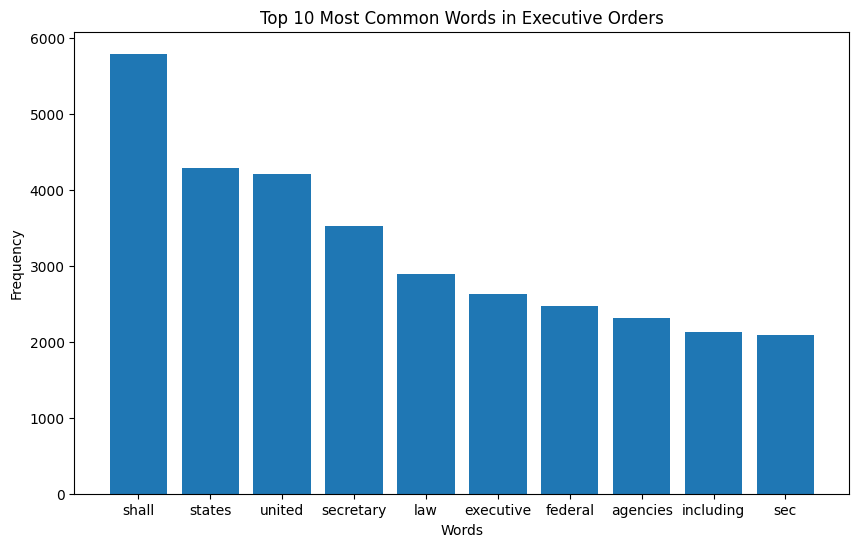

In [13]:
from collections import Counter
import matplotlib.pyplot as plt

# Count word frequency in the cleaned text
all_words = ' '.join(df['cleaned_text']).split()
word_counts = Counter(all_words)
common_words = word_counts.most_common(10)  # Top 10 most common words

# Create a bar chart
words, counts = zip(*common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.title('Top 10 Most Common Words in Executive Orders')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


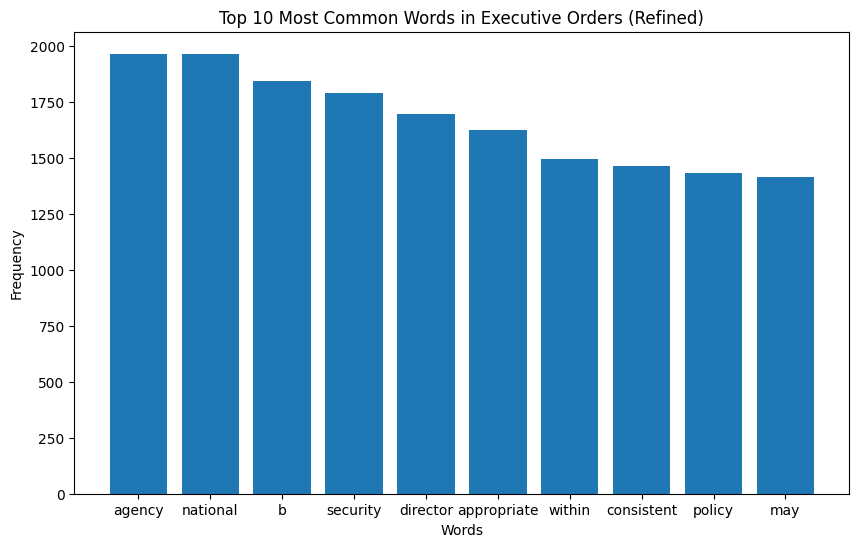

In [14]:
# Adding additional common terms to the stop words list
additional_stop_words = {'shall', 'states', 'united', 'federal', 'executive', 
                         'law', 'agencies', 'including', 'sec', 'secretary', 'order'}
stop_words = stop_words.union(additional_stop_words)


df['cleaned_text'] = df['text'].apply(clean_text)

# Count word frequency in the cleaned text
all_words = ' '.join(df['cleaned_text']).split()
word_counts = Counter(all_words)
common_words = word_counts.most_common(10)  # Top 10 most common words

# Create a bar chart
words, counts = zip(*common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.title('Top 10 Most Common Words in Executive Orders (Refined)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()



In [19]:
from nltk.util import ngrams
from collections import Counter

def get_bigrams(text):
    # Tokenize the cleaned text
    words = text.split()
    # Generate bigrams
    bigrams = list(ngrams(words, 2))
    # Join the bigrams with a space for better readability
    bigram_words = [' '.join(bigram) for bigram in bigrams]
    return bigram_words

In [20]:
# Apply the function to generate bigrams for each cleaned text
df['bigrams'] = df['cleaned_text'].apply(get_bigrams)


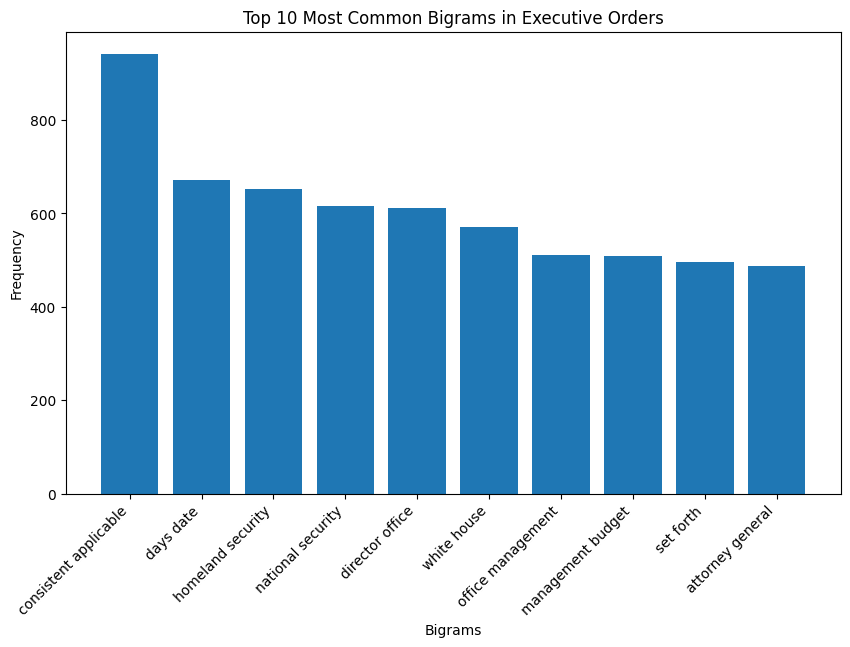

In [21]:
# Flatten the list of all bigrams into a single list
all_bigrams = [bigram for sublist in df['bigrams'] for bigram in sublist]
bigram_counts = Counter(all_bigrams)
common_bigrams = bigram_counts.most_common(10)  # Top 10 most common bigrams

# Create a bar chart
bigram_words, counts = zip(*common_bigrams)
plt.figure(figsize=(10, 6))
plt.bar(bigram_words, counts)
plt.title('Top 10 Most Common Bigrams in Executive Orders')
plt.xlabel('Bigrams')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better visibility
plt.ylabel('Frequency')
plt.show()


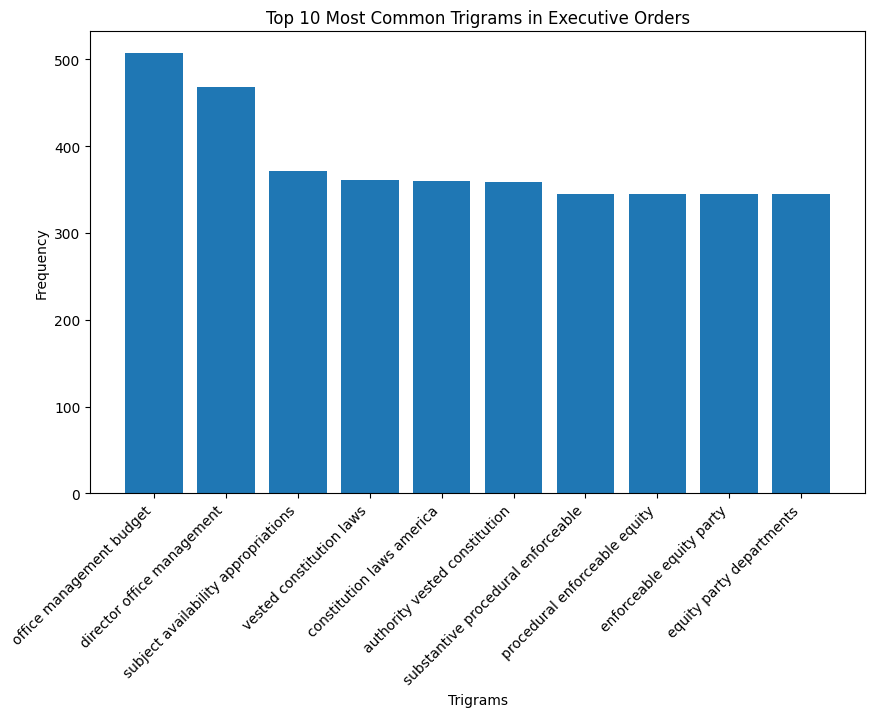

In [22]:
def get_trigrams(text):
    # Tokenize the cleaned text
    words = text.split()
    # Generate trigrams
    trigrams = list(ngrams(words, 3))
    # Join the trigrams with a space for better readability
    trigram_words = [' '.join(trigram) for trigram in trigrams]
    return trigram_words

# Apply the function to generate trigrams for each cleaned text
df['trigrams'] = df['cleaned_text'].apply(get_trigrams)

# Flatten and count the trigrams
all_trigrams = [trigram for sublist in df['trigrams'] for trigram in sublist]
trigram_counts = Counter(all_trigrams)
common_trigrams = trigram_counts.most_common(10)  # Top 10 most common trigrams

# Visualize the trigrams
trigram_words, counts = zip(*common_trigrams)
plt.figure(figsize=(10, 6))
plt.bar(trigram_words, counts)
plt.title('Top 10 Most Common Trigrams in Executive Orders')
plt.xlabel('Trigrams')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Frequency')
plt.show()
